In [1]:
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle

In [2]:
#d3-20c
palette=["#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d", "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476", "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc", "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"]
colors=palette[0:20:4]

In [3]:
def plt_resize_text(axes, labelsize, titlesize):
    for ticklabel in (axes.get_xticklabels()):
        ticklabel.set_fontsize(labelsize)
    for ticklabel in (axes.get_yticklabels()):
        ticklabel.set_fontsize(labelsize)
    axes.xaxis.get_label().set_fontsize(labelsize)
    axes.yaxis.get_label().set_fontsize(labelsize)
    axes.title.set_fontsize(titlesize)
    if axes.get_legend() is not None:
        for t in axes.get_legend().get_texts():
            t.set_fontsize(labelsize)

In [4]:
envs=[
    "AirRaidNoFrameskip-v4"
    ,"CarnivalNoFrameskip-v4"
    ,"DemonAttackNoFrameskip-v4"
    ,"NameThisGameNoFrameskip-v4"
    ,"PongNoFrameskip-v4"
    ,"SpaceInvadersNoFrameskip-v4"
]

In [5]:
human=[0, 0, 3401, 4076, 9.3, 1652]

In [6]:
with open('./paper/paper.data.processed.pkl', 'rb') as f:
    paper = pickle.load(f)

In [7]:
musigma = pd.read_csv("./popart/steps.mu.sigma.csv")
multitask = pd.read_csv("./MultiTask.txt")
singletask = pd.read_csv("./SingleTask.txt")
pretrained = pd.read_csv("./Pretrained.txt")
detrained = pd.read_csv("./Detrained.txt")
popart = pd.read_csv("./Popart.txt")

In [8]:
popart

,model_id,model_steps,env_name,ep_steps,ep_return
0,MultiTaskPopart,1005440,AirRaidNoFrameskip-v4,2729,6925.0
1,MultiTaskPopart,1005440,AirRaidNoFrameskip-v4,2165,100.0
2,MultiTaskPopart,1005440,AirRaidNoFrameskip-v4,1850,100.0
3,MultiTaskPopart,1005440,AirRaidNoFrameskip-v4,2326,425.0
4,MultiTaskPopart,1005440,AirRaidNoFrameskip-v4,2326,425.0
...,...,...,...,...,...
179494,MultiTaskPopart,300010240,SpaceInvadersNoFrameskip-v4,1927,2430.0
179495,MultiTaskPopart,300010240,SpaceInvadersNoFrameskip-v4,1926,2430.0
179496,MultiTaskPopart,300010240,SpaceInvadersNoFrameskip-v4,1929,2430.0
179497,MultiTaskPopart,300010240,SpaceInvadersNoFrameskip-v4,2927,3355.0


In [9]:
musigma

,steps0,steps1,steps2,steps3,steps4,steps5,mu0,mu1,mu2,mu3,mu4,mu5,sigma0,sigma1,sigma2,sigma3,sigma4,sigma5
0,0,0,480,0,80,80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,1.0000,1.0000,1.0000,1.00000,1.0000
1,80,80,560,80,240,240,0.000000,0.000000,0.003100,0.000000,-0.000200,0.003500,1.0000,1.0000,1.0020,1.0000,0.99970,1.0002
2,160,80,560,400,400,320,0.000013,0.009161,0.004246,-0.000014,-0.000284,0.004207,0.9996,1.0075,1.0027,0.9996,0.99930,1.0011
3,320,160,560,560,560,400,0.005298,0.009161,0.004246,-0.000002,-0.000382,0.004231,1.0043,1.0075,1.0027,0.9992,0.99910,1.0007
4,560,160,800,640,560,480,0.013389,0.015113,0.004246,-0.000013,-0.000505,0.004279,1.0139,1.0144,1.0027,0.9988,0.99880,1.0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468761,49372320,49155920,51266160,49655360,50032880,50525040,221.240000,1647.000000,438.790000,217.580000,0.913620,111.490000,35.2560,428.8300,73.3710,36.0820,0.28019,29.7770
468762,49372400,49155920,51266240,49655600,50033120,50525040,221.240000,1647.100000,438.830000,217.580000,0.913570,111.480000,35.2560,428.9400,73.3670,36.0800,0.28015,29.7800
468763,49372560,49156000,51266400,49655760,50033120,50525120,221.240000,1647.100000,438.860000,217.580000,0.913580,111.480000,35.2530,428.9400,73.3690,36.0860,0.28017,29.7800
468764,49372800,49156080,51266560,49655840,50033200,50525120,221.240000,1646.800000,438.880000,217.580000,0.913580,111.450000,35.2510,428.9100,73.3640,36.0820,0.28017,29.7710


In [10]:
steps = np.unique(multitask["model_steps"])
multitask_mean = np.zeros((steps.shape[0], 6))
multitask_std = np.zeros((steps.shape[0], 6))
multitask_step = np.zeros((steps.shape[0], 6))
for i in range(len(envs)):
    multitask_step[:, i] = steps / 6.e6
    for j in range(steps.shape[0]):
        multitask_mean[j, i] = np.mean(multitask[np.logical_and(multitask.env_name==envs[i], multitask.model_steps==steps[j])]["ep_return"])
        multitask_std[j, i] = np.std(multitask[np.logical_and(multitask.env_name==envs[i], multitask.model_steps==steps[j])]["ep_return"])

In [11]:
steps = np.unique(singletask[singletask.env_name==envs[0]]["model_steps"])
singletask_mean = np.zeros((steps.shape[0], 6))
singletask_std = np.zeros((steps.shape[0], 6))
singletask_step = np.zeros((steps.shape[0], 6))
for i in range(len(envs)):
    steps = np.unique(singletask[singletask.env_name==envs[i]]["model_steps"])
    singletask_step[:, i] = steps / 1.e6
    for j in range(steps.shape[0]):
        singletask_mean[j, i] = np.mean(singletask[np.logical_and(singletask.env_name==envs[i], singletask.model_steps==steps[j])]["ep_return"])
        singletask_std[j, i] = np.std(singletask[np.logical_and(singletask.env_name==envs[i], singletask.model_steps==steps[j])]["ep_return"])

In [12]:
steps = np.unique(pretrained[pretrained.env_name==envs[3]]["model_steps"])
pretrained_mean = np.zeros((steps.shape[0], 6))
pretrained_std = np.zeros((steps.shape[0], 6))
pretrained_step = np.zeros((steps.shape[0], 6))
for i in range(3, 6):
    steps = np.unique(pretrained[pretrained.env_name==envs[i]]["model_steps"])
    pretrained_step[:, i] = (steps-100.e6) / 1.e6
    for j in range(steps.shape[0]):
        pretrained_mean[j, i] = np.mean(pretrained[np.logical_and(pretrained.env_name==envs[i], pretrained.model_steps==steps[j])]["ep_return"])
        pretrained_std[j, i] = np.std(pretrained[np.logical_and(pretrained.env_name==envs[i], pretrained.model_steps==steps[j])]["ep_return"])

In [13]:
steps = np.unique(popart[popart.env_name==envs[1]]["model_steps"])
popart_mean = np.zeros((steps.shape[0], 6))
popart_std = np.zeros((steps.shape[0], 6))
popart_step = np.zeros((steps.shape[0], 6))
for i in range(len(envs)):
    steps = np.unique(popart[popart.env_name==envs[i]]["model_steps"])
    popart_step[:len(steps), i] = steps / 6.e6
    for j in range(steps.shape[0]):
        popart_mean[j, i] = np.mean(popart[np.logical_and(popart.env_name==envs[i], popart.model_steps==steps[j])]["ep_return"])
        popart_std[j, i] = np.std(popart[np.logical_and(popart.env_name==envs[i], popart.model_steps==steps[j])]["ep_return"])

In [14]:
detrained_stat = {}
idx = np.array(detrained[["model_id", "env_name"]].drop_duplicates())
for i in range(idx.shape[0]):
    model = idx[i, 0]
    env = idx[i, 1] 
    steps = np.unique(detrained[np.logical_and(detrained.env_name==env, detrained.model_id==model)]["model_steps"])
    data = detrained[np.logical_and(detrained.env_name==env, detrained.model_id==model)][["model_steps", "ep_return"]]
    n = steps.shape[0]
    mean = np.zeros(n)
    std = np.zeros(n)
    for j in range(n):
        mean[j] = np.mean(data[data.model_steps==steps[j]]["ep_return"])
        std[j] = np.std(data[data.model_steps==steps[j]]["ep_return"])    
    stat = {}
    stat["step"] = ( steps - 100.e6 ) / 1.e6
    stat["mean"] = mean
    stat["std"] = std
    detrained_stat[(model, env)] = stat

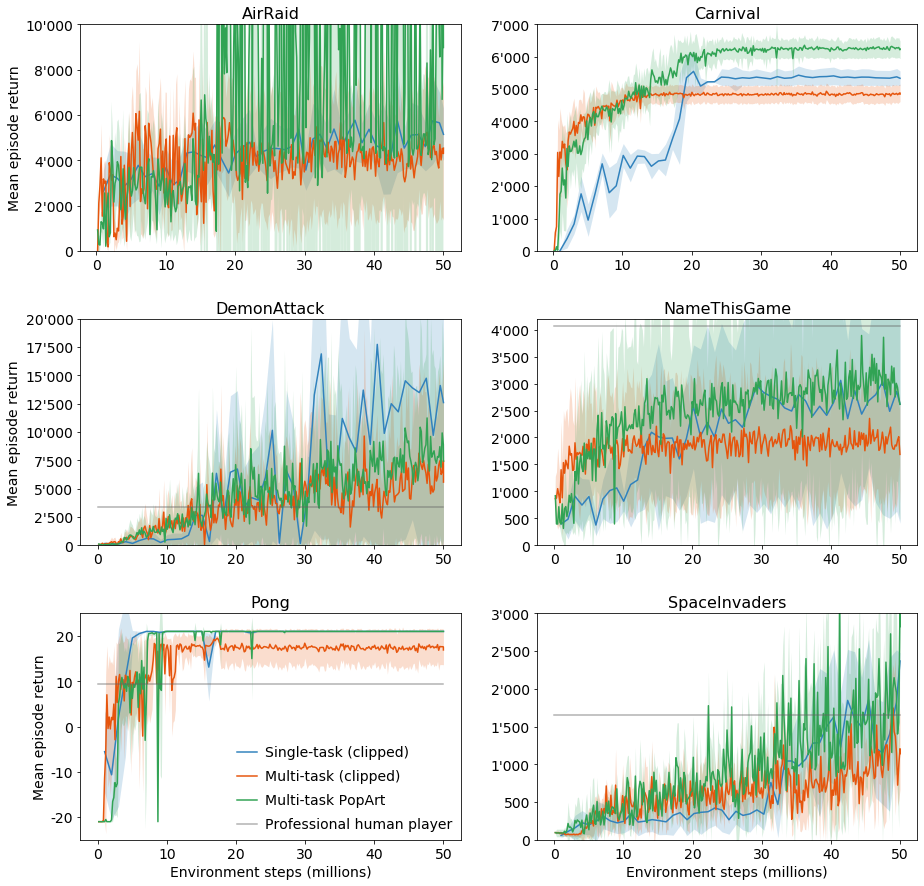

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
ylims = [[0., 10000.], [0., 7000.], [0., 20000.], [0., 4200.], [-25., 25.], [0., 3000.]]
for i in range(3):
    for j in range(2):
        k = i * 2 + j
        axes[i, j].fill_between(singletask_step[:, k], singletask_mean[:, k] - singletask_std[:, k], singletask_mean[:, k] + singletask_std[:, k], alpha=0.2, color=colors[0], linewidth=0.0)
        axes[i, j].plot(singletask_step[:, k], singletask_mean[:, k], label="Single-task (clipped)", color=colors[0])
        axes[i, j].fill_between(multitask_step[:, k], multitask_mean[:, k] - multitask_std[:, k], multitask_mean[:, k] + multitask_std[:, k], alpha=0.2, color=colors[1], linewidth=0.0)
        axes[i, j].plot(multitask_step[:, k], multitask_mean[:, k], label="Multi-task (clipped)", color=colors[1])
        axes[i, j].fill_between(popart_step[:, k], popart_mean[:, k] - popart_std[:, k], popart_mean[:, k] + popart_std[:, k], alpha=0.2, color=colors[2], linewidth=0.0)
        axes[i, j].plot(popart_step[:, k], popart_mean[:, k], label="Multi-task PopArt", color=colors[2])
        #if k >= 3:
        #    axes[i, j].fill_between(pretrained_step[:, k], pretrained_mean[:, k] - pretrained_std[:, k], pretrained_mean[:, k] + pretrained_std[:, k], alpha=0.2, color=colors[3])
        #    axes[i, j].plot(pretrained_step[:, k], pretrained_mean[:, k], label="Single-task (pretrained, clipped)", color=colors[3]) 
        #axes[i, j].plot(paper[envs[k]][0] / 1.e6, paper[envs[k]][1], label="Torchbeast paper", alpha=0.3, color=colors[4])
        axes[i, j].title.set_text(envs[k].replace("NoFrameskip-v4", ""))
        axes[i, j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(",", "\'")))
        
        if k > 1:
            axes[i, j].plot(np.linspace(0, 50, 51), np.ones(51)*human[k], label="Professional human player", color=colors[4], alpha=0.5)       
        
        axes[i, j].set_ylim(ylims[k])
        if k == 4:
            axes[i, j].legend(frameon=False, labelspacing=1)
        if j == 0:
            axes[i, j].set_ylabel('Mean episode return')
        if i == 2:
            axes[i, j].set_xlabel('Environment steps (millions)')  
        plt_resize_text(axes[i, j], 14, 16)
plt.subplots_adjust(hspace=0.3)        

In [16]:
fig.savefig("./fig_mean_episode_return.png", bbox_inches="tight", dpi=300)

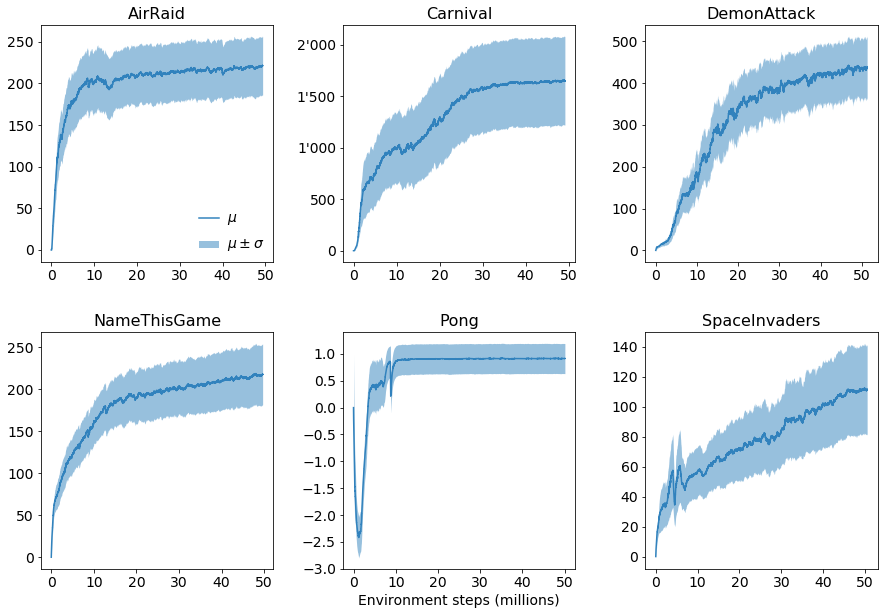

In [17]:
fig2, axes2 = plt.subplots(2, 3, figsize=(15,10))
musigma = np.array(musigma)
for i in range(2):
    for j in range(3):
        k = i * 3 + j
        axes2[i, j].fill_between(musigma[:, k] / 1.e6, musigma[:, k+6] - musigma[:, k+12], musigma[:, k+6] + musigma[:, k+12], alpha=0.5, label="$\mu\pm\sigma$", color=colors[0], linewidth=0.0)
        axes2[i, j].plot(musigma[:, k] / 1.e6, musigma[:, k+6], label="$\mu$", color=colors[0])
        if k != 4:
            axes2[i, j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(",", "\'")))
        axes2[i, j].title.set_text(envs[k].replace("NoFrameskip-v4", ""))
        if k == 0:
            axes2[i, j].legend(frameon=False, labelspacing=1, loc="lower right")
        if k == 4:
            axes2[i, j].set_xlabel('Environment steps (millions)')  
        plt_resize_text(axes2[i, j], 14, 16)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)


In [18]:
fig2.savefig("./fig_mu_sigma.png", bbox_inches="tight", dpi=300)

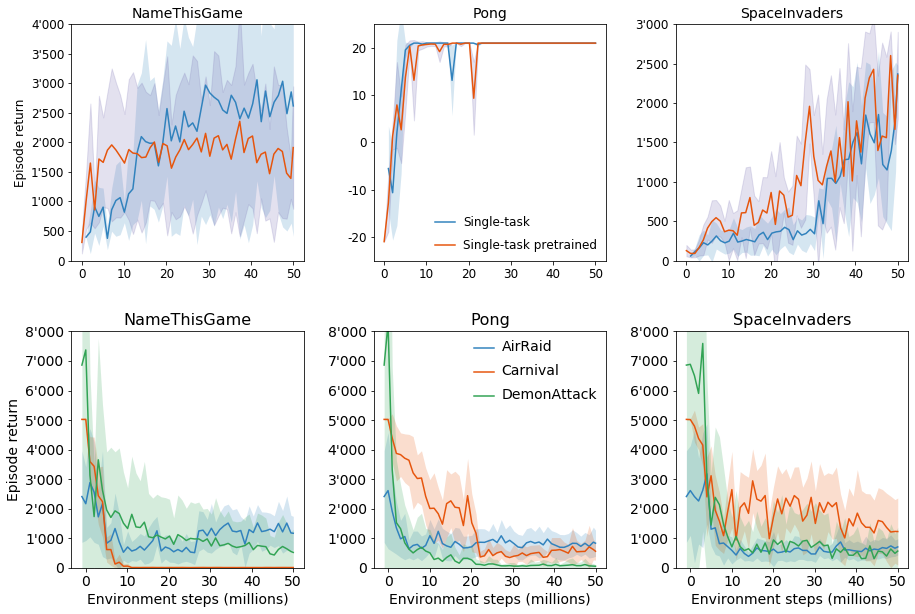

In [19]:
fig3, axes3 = plt.subplots(2, 3, figsize=(15,10))
ylims = [[0., 4000.], [-25., 25.], [0., 3000.]]
for i in range(3):
    k = i + 3
    env = envs[k]
    axes3[0, i].fill_between(singletask_step[:, k], singletask_mean[:, k] - singletask_std[:, k], singletask_mean[:, k] + singletask_std[:, k], alpha=0.2, color=colors[0], linewidth=0.0)
    axes3[0, i].plot(singletask_step[:, k], singletask_mean[:, k], label="Single-task", color=colors[0])
    
    axes3[0, i].fill_between(pretrained_step[:, k], pretrained_mean[:, k] - pretrained_std[:, k], pretrained_mean[:, k] + pretrained_std[:, k], alpha=0.2, color=colors[3])
    axes3[0, i].plot(pretrained_step[:, k], pretrained_mean[:, k], label="Single-task pretrained", color=colors[1]) 
    axes3[0, i].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(",", "\'")))
    if i == 0:
        axes3[0, i].set_ylabel('Episode return')
    axes3[0, i].title.set_text(env.replace("NoFrameskip-v4", ""))
    if i == 1:
        axes3[0, i].legend(frameon=False, labelspacing=1, loc="lower right")
    axes3[0, i].set_ylim(ylims[i])
    plt_resize_text(axes3[0, i], 12, 14)
    
ylims = [[0., 3500.], [0., 5500.], [0., 10000.]]
for i in range(3):
    model = ["MultiTask3NameThisGame", "MultiTask3Pong", "MultiTask3SpaceInvaders"][i]
    k = 0
    for env in envs[:3]:
        step = detrained_stat[(model, env)]["step"]
        mean = detrained_stat[(model, env)]["mean"]
        std = detrained_stat[(model, env)]["std"]
        axes3[1, i].fill_between(step, mean - std, mean + std, alpha=0.2, color=colors[k], linewidth=0.0)
        axes3[1, i].plot(step, mean, label=env.replace("NoFrameskip-v4", ""), color=colors[k])
        k = k + 1
    axes3[1, i].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(",", "\'")))
    if i == 0:
        axes3[1, i].set_ylabel('Episode return')
    axes3[1, i].set_xlabel('Environment steps (millions)')  
    axes3[1, i].set_ylim(0, 8000)        
    axes3[1, i].title.set_text(envs[i+3].replace("NoFrameskip-v4", ""))
    if i == 1:
        axes3[1, i].legend(frameon=False, labelspacing=1)
    plt_resize_text(axes3[1, i], 14, 16)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [20]:
fig3.savefig("./fig_pre_and_detraining.png", bbox_inches="tight", dpi=300)